In [1]:
import importlib

importlib.import_module("make_blocks")
from make_blocks import *

importlib.import_module("plotfun")
import warnings
warnings.filterwarnings('ignore')

importlib.import_module("get_all_fun_used")
from get_all_fun_used import *

import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline
#sns.set_context('notebook')
#%config InlineBackend.figure_format = 'retina'

from operator import itemgetter, attrgetter
import os

os.chdir('/NS/social-net-blockchain/work/vpahari/block500/code/code/wfq_pickle_files')
import importlib

importlib.import_module("block")
from block import *

importlib.import_module("transaction")
from transaction import *

os.chdir('/NS/social-net-blockchain/work/vpahari/block500/code/code')

from plotfun import *
importlib.import_module("utils_plot")
from notebook_utils_plot import *


/home/vpahari/anaconda3/bin/python
/home/vpahari/anaconda3/bin/python
/home/vpahari/anaconda3/bin/python


In [2]:
#List of hashrates of MPOs that we run the simulations on
hlist_full = [[0.49,0.51], [0.25,0.35,0.4],[0.15,0.2,0.3,0.35],[0.1,0.15,0.2,0.25,0.3],[0.1,0.14,0.16,0.17,0.18,0.25],[0.05,0.1,0.14,0.16,0.17,0.18,0.2]]
hlist_full_2 = [[0.1,0.3,0.6],[0.1,0.15,0.25,0.5],[0.05,0.1,0.15,0.2,0.5],[0.05,0.08,0.1,0.12,0.15,0.5],[0.03,0.05,0.08,0.09,0.1,0.15,0.5]]

#List of arrival rates
arrival_list = [0.5, 0.8, 0.9,0.95,0.99,1.0,1.01,1.1,1.3,2.0,3.0,4.0]

# Background

In this notebook, we show how much of the total fee, each miner receives as a function of the arrival rate.

In our simulations, we make the assumption that every transaction has size 1, and every block mined is of size 1.

We built a round based simulator, where each round one MPO mines one block. The probability that a MPO mines the next block is its hashrate.

The arrival rate corresponds to how many transactions come in every round on average. It is sampled from a poission distribution.

We want to see how congestion affects the earning of the miners when there are open fees offered to every MPO and dark fees offered only to one MPO.



In [3]:
def plot_miner_fee_with_arrival(arr,l,hlist,savefigname, ylimbool = True):
    
    style_list = ['-','--',':','-.']
    
    fig, ax = plt.subplots()
    for i in range(len(l)):
        if i == 4:
            ax.plot(arr, l[i],label = str(hlist[i]),marker = '*',markersize=10)
        elif i == 5:
            ax.plot(arr, l[i],'-o',label = str(hlist[i]))
        elif i == 6:
            ax.plot(arr, l[i],label = str(hlist[i]), color = 'k',marker = 'x',markersize=10)
        else:
            ax.plot(arr, l[i],label = str(hlist[i]), linestyle = style_list[i])
            
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
    
    if ylimbool:
        plt.ylim(0,0.5)
    else:
        plt.ylim(0,1.0)
    plt.legend(bbox_to_anchor=(1,1), loc='upper left')
    plt.xlabel('Arrival Rate')
    plt.ylabel('Fraction of Total Fee')
    plt.savefig(savefigname, bbox_inches = 'tight')
    plt.show()
    plt.clf()

In [4]:
def multiple_arrival(nummpo, h, arrival_rate_list):
    
    final_list = [[] for i in range(nummpo)]
    
    for arrival_rate in arrival_rate_list:
        
        if arrival_rate == 0.5:
            with open("wfq_pickle_files/new_poission_files/MPO_"+ str(nummpo) +"/hlist="+ str(h) +"/fee_"+ str(nummpo) +"_inittx_0_numblocks_100000_"+ str(h) + "_arrivalrate_" + str(arrival_rate) + "_type_GAUSS.pickle", "rb") as openfile:
                fee_gauss = pickle.load(openfile)
        
        elif arrival_rate == 1:
            with open("wfq_pickle_files/new_poission_files/MPO_"+ str(nummpo) +"/hlist="+ str(h) +"/fee_"+ str(nummpo) +"_inittx_0_numblocks_1000000_"+ str(h)  + ".pickle", "rb") as openfile:
                fee_gauss = pickle.load(openfile)
            
        elif arrival_rate > 1 and arrival_rate <= 1.31:
            with open("wfq_pickle_files/new_poission_files/MPO_"+ str(nummpo) +"/hlist="+ str(h) +"/fee_"+ str(nummpo) +"_inittx_0_numblocks_100000_"+ str(h) + "_arrivalrate_" + str(arrival_rate) + "_type_GAUSS.pickle", "rb") as openfile:
                fee_gauss = pickle.load(openfile)

        elif arrival_rate == 0.99 or arrival_rate == 0.97:
            with open("wfq_pickle_files/new_poission_files/MPO_"+ str(nummpo) +"/hlist="+ str(h) +"/fee_"+ str(nummpo) +"_inittx_0_numblocks_1000000_"+ str(h) + "_arrivalrate_" + str(arrival_rate) + "_type_GAUSS.pickle", "rb") as openfile:
                fee_gauss = pickle.load(openfile)
        
        elif arrival_rate >= 1.5:
            with open("wfq_pickle_files/only_dark_files/MPO_"+ str(nummpo) +"/hlist="+ str(h) +"/fee_"+ str(nummpo) +"_inittx_0_numblocks_100000_"+ str(h) + "_arrivalrate_" + str(arrival_rate) + "_type_GAUSS.pickle", "rb") as openfile:
                fee_gauss = pickle.load(openfile)   
                
        else:
            with open("wfq_pickle_files/new_poission_files/MPO_"+ str(nummpo) +"/hlist="+ str(h) +"/fee_"+ str(nummpo) +"_inittx_0_numblocks_1000000_"+ str(h) + "_arrivalrate_" + str(arrival_rate) + ".pickle", "rb") as openfile:
                fee_gauss = pickle.load(openfile)
        
        #We take the first 100,000 blocks because some simulations were only run for 100,000 blocks due to time constraints
        fee_gauss = fee_gauss[:100000]
        fee_gauss_new = list(map(lambda x : round(x / sum(fee_gauss[-1]),4), fee_gauss[-1]))
        
        for i in range(len(fee_gauss_new)):
            final_list[i].append(fee_gauss_new[i])
            
    return final_list

def multiple_arrival_EXP(nummpo, h, arrival_rate_list):
    
    final_list = [[] for i in range(nummpo)]
    
    for arrival_rate in arrival_rate_list:
        
        if arrival_rate == 0.5:
            with open("wfq_pickle_files/new_poission_files/MPO_"+ str(nummpo) +"/hlist="+ str(h) +"/fee_"+ str(nummpo) +"_inittx_0_numblocks_100000_"+ str(h) + "_arrivalrate_" + str(arrival_rate) + "_type_EXP.pickle", "rb") as openfile:
                fee_gauss = pickle.load(openfile)
        
        elif arrival_rate <= 1:
            with open("wfq_pickle_files/new_poission_files/MPO_"+ str(nummpo) +"/hlist="+ str(h) +"/fee_"+ str(nummpo) +"_inittx_0_numblocks_1000000_"+ str(h) + "_arrivalrate_" + str(arrival_rate) + "_type_EXP.pickle", "rb") as openfile:
                fee_gauss = pickle.load(openfile)
        
        elif arrival_rate >= 1.5:
            with open("wfq_pickle_files/only_dark_files/MPO_"+ str(nummpo) +"/hlist="+ str(h) +"/fee_"+ str(nummpo) +"_inittx_0_numblocks_100000_"+ str(h) + "_arrivalrate_" + str(arrival_rate) + "_type_EXP.pickle", "rb") as openfile:
                fee_gauss = pickle.load(openfile)   
                
        else:
            with open("wfq_pickle_files/new_poission_files/MPO_"+ str(nummpo) +"/hlist="+ str(h) +"/fee_"+ str(nummpo) +"_inittx_0_numblocks_100000_"+ str(h) + "_arrivalrate_" + str(arrival_rate) + "_type_EXP.pickle", "rb") as openfile:
                fee_gauss = pickle.load(openfile)
                
        #We take the first 100,000 blocks because some simulations were only run for 100,000 blocks due to time constraints
        fee_gauss = fee_gauss[:100000]
        fee_gauss_new = list(map(lambda x : round(x / sum(fee_gauss[-1]),4), fee_gauss[-1]))

        for i in range(len(fee_gauss_new)):
            final_list[i].append(fee_gauss_new[i])
            
    return final_list


In [5]:
final_list_4_0 = multiple_arrival(4, 0.35, arrival_list)
final_list_5_0 = multiple_arrival(5, 0.3, arrival_list)
final_list_6_0 = multiple_arrival(6, 0.25, arrival_list)
final_list_7_0 = multiple_arrival(7, 0.2, arrival_list)

final_list_4_1 = multiple_arrival(4, 0.5, arrival_list)
final_list_5_1 = multiple_arrival(5, 0.5, arrival_list)
final_list_6_1 = multiple_arrival(6, 0.5, arrival_list)
final_list_7_1 = multiple_arrival(7, 0.5, arrival_list)

final_list_4_0_exp = multiple_arrival_EXP(4, 0.35, arrival_list)
final_list_5_0_exp = multiple_arrival_EXP(5, 0.3, arrival_list)
final_list_6_0_exp = multiple_arrival_EXP(6, 0.25, arrival_list)
final_list_7_0_exp = multiple_arrival_EXP(7, 0.2, arrival_list)

final_list_4_1_exp = multiple_arrival_EXP(4, 0.5, arrival_list)
final_list_5_1_exp = multiple_arrival_EXP(5, 0.5, arrival_list)
final_list_6_1_exp = multiple_arrival_EXP(6, 0.5, arrival_list)
final_list_7_1_exp = multiple_arrival_EXP(7, 0.5, arrival_list)

# Result

We see that the miner with the largest hashrate receives a disproportionate amount of the total fees given its hashrate at the expense of the other smaller miners. We see that the largest discrepency happens during the time of intermediate congestion (around arrival rate of 1). 

We further note that when the arrival rate is small and when the arrival rate is large, the miners receives fees proportional to their hashrates. This means when transactions issuers are allowed to offer their fees as open or dark, the point of intermediate congestion creates an issue of unfairness among miners in regards to their earnings.

The results below show that this holds across all simulations with different number of MPOs and different distribution of hashrates. We also show this holds when the feerates are sampled from a Gaussian or an Exponential Distribution


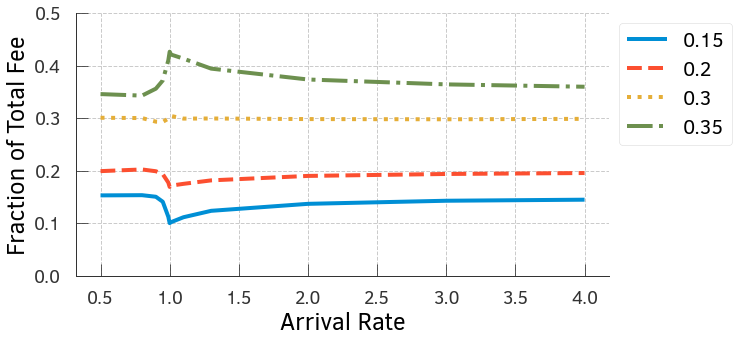

<Figure size 612x324 with 0 Axes>

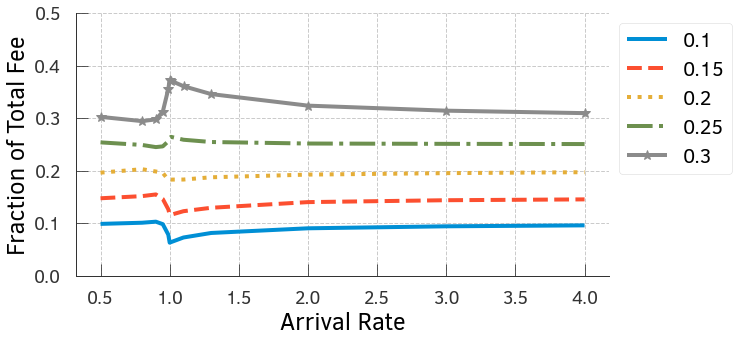

<Figure size 612x324 with 0 Axes>

<Figure size 612x324 with 0 Axes>

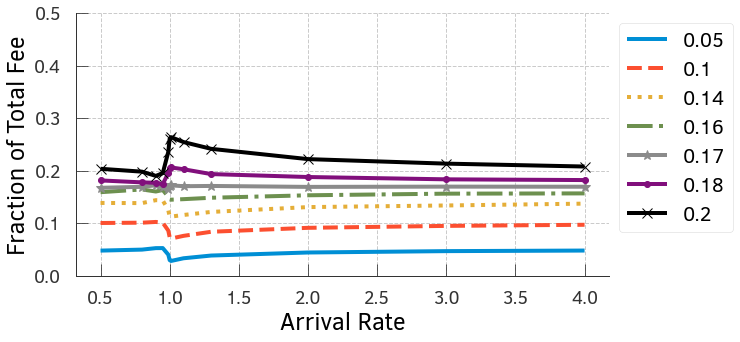

<Figure size 612x324 with 0 Axes>

In [6]:
for form in ['.pdf']:

    plot_miner_fee_with_arrival(arrival_list,final_list_4_0,hlist_full[2],'wfq_pickle_files/figures_for_paper/miner_fee/frac_diff_arrival_4_0.35_GAUSS' + form,True)
    plot_miner_fee_with_arrival(arrival_list,final_list_5_0,hlist_full[3],'wfq_pickle_files/figures_for_paper/miner_fee/frac_diff_arrival_5_0.3_GAUSS' + form,True)
    plot_miner_fee_with_arrival(arrival_list,final_list_6_0,hlist_full[4],'wfq_pickle_files/figures_for_paper/miner_fee/frac_diff_arrival_6_0.25_GAUSS' + form,True)
    plot_miner_fee_with_arrival(arrival_list,final_list_7_0,hlist_full[5],'wfq_pickle_files/figures_for_paper/miner_fee/frac_diff_arrival_7_0.2_GAUSS' + form,True)


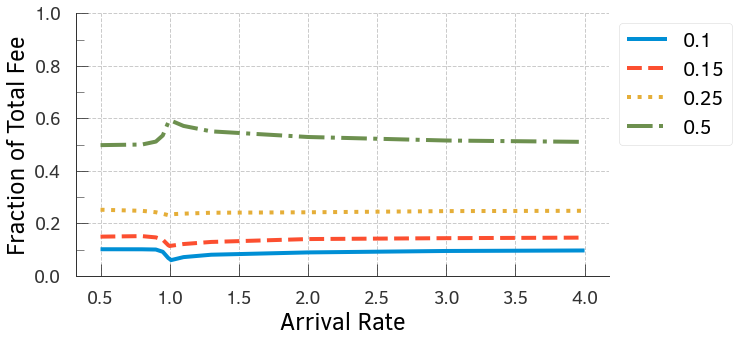

<Figure size 612x324 with 0 Axes>

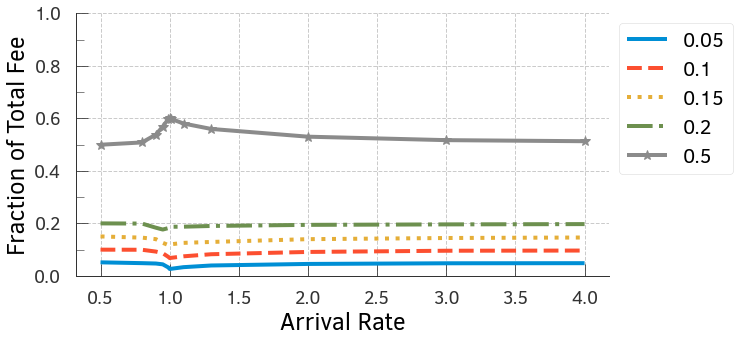

<Figure size 612x324 with 0 Axes>

<Figure size 612x324 with 0 Axes>

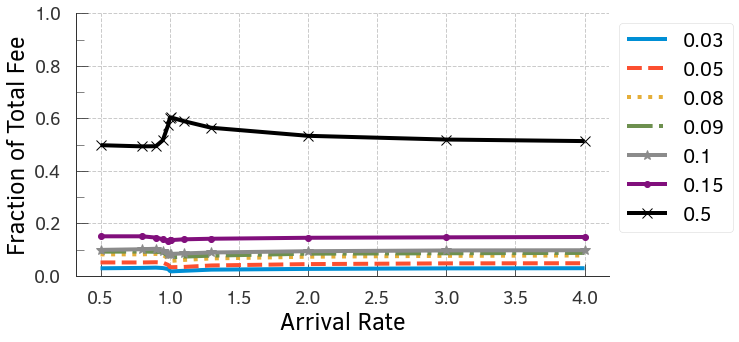

<Figure size 612x324 with 0 Axes>

In [8]:
for form in ['.pdf']:
    plot_miner_fee_with_arrival(arrival_list,final_list_4_1,hlist_full_2[1],'wfq_pickle_files/figures_for_paper/miner_fee/frac_diff_arrival_4_0.5_GAUSS' + form,False)
    plot_miner_fee_with_arrival(arrival_list,final_list_5_1,hlist_full_2[2],'wfq_pickle_files/figures_for_paper/miner_fee/frac_diff_arrival_5_0.5_GAUSS' + form,False)
    plot_miner_fee_with_arrival(arrival_list,final_list_6_1,hlist_full_2[3],'wfq_pickle_files/figures_for_paper/miner_fee/frac_diff_arrival_6_0.5_GAUSS' + form,False)
    plot_miner_fee_with_arrival(arrival_list,final_list_7_1,hlist_full_2[4],'wfq_pickle_files/figures_for_paper/miner_fee/frac_diff_arrival_7_0.5_GAUSS' + form,False)


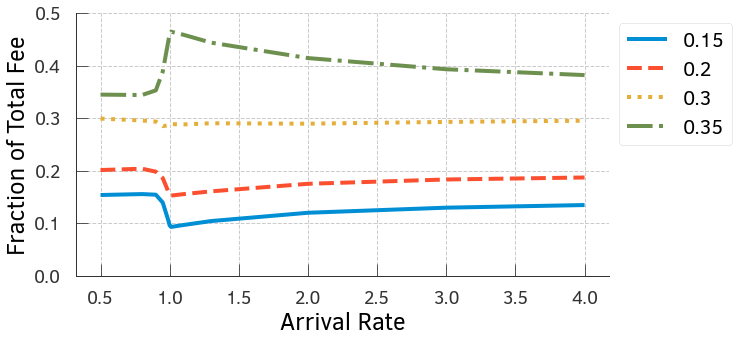

<Figure size 612x324 with 0 Axes>

<Figure size 612x324 with 0 Axes>

<Figure size 612x324 with 0 Axes>

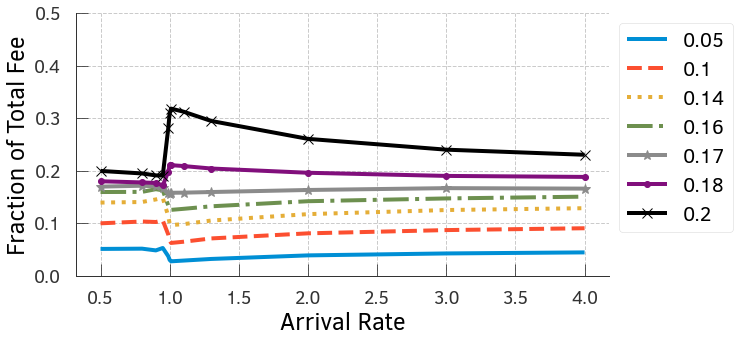

<Figure size 612x324 with 0 Axes>

In [7]:
for form in ['.pdf']:
    plot_miner_fee_with_arrival(arrival_list,final_list_4_0_exp,hlist_full[2],'wfq_pickle_files/figures_for_paper/miner_fee/frac_diff_arrival_4_0.35_EXP' + form,True)
    plot_miner_fee_with_arrival(arrival_list,final_list_5_0_exp,hlist_full[3],'wfq_pickle_files/figures_for_paper/miner_fee/frac_diff_arrival_5_0.3_EXP' + form,True)
    plot_miner_fee_with_arrival(arrival_list,final_list_6_0_exp,hlist_full[4],'wfq_pickle_files/figures_for_paper/miner_fee/frac_diff_arrival_6_0.25_EXP' + form,True)
    plot_miner_fee_with_arrival(arrival_list,final_list_7_0_exp,hlist_full[5],'wfq_pickle_files/figures_for_paper/miner_fee/frac_diff_arrival_7_0.2_EXP' + form,True)



<Figure size 612x324 with 0 Axes>

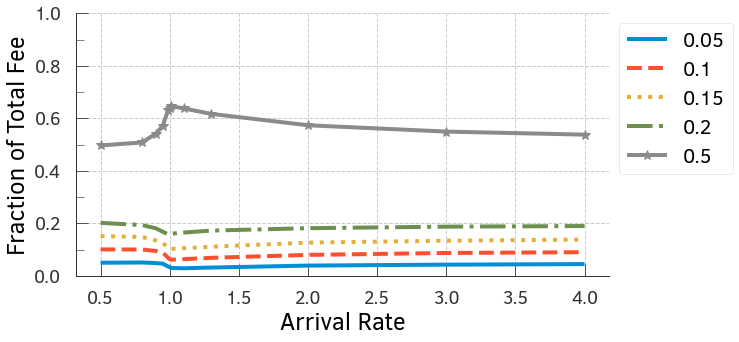

<Figure size 612x324 with 0 Axes>

<Figure size 612x324 with 0 Axes>

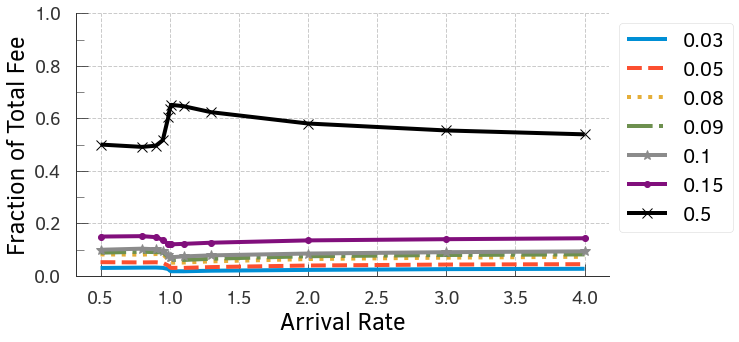

<Figure size 612x324 with 0 Axes>

In [9]:
for form in ['.pdf']: 
    plot_miner_fee_with_arrival(arrival_list,final_list_4_1_exp,hlist_full_2[1],'wfq_pickle_files/figures_for_paper/miner_fee/frac_diff_arrival_4_0.5_EXP' + form,False)
    plot_miner_fee_with_arrival(arrival_list,final_list_5_1_exp,hlist_full_2[2],'wfq_pickle_files/figures_for_paper/miner_fee/frac_diff_arrival_5_0.5_EXP' + form,False)
    plot_miner_fee_with_arrival(arrival_list,final_list_6_1_exp,hlist_full_2[3],'wfq_pickle_files/figures_for_paper/miner_fee/frac_diff_arrival_6_0.5_EXP' + form,False)
    plot_miner_fee_with_arrival(arrival_list,final_list_7_1_exp,hlist_full_2[4],'wfq_pickle_files/figures_for_paper/miner_fee/frac_diff_arrival_7_0.5_EXP' + form,False)
